## Random Variables and Probability Distributions

A random variable is a variable whose possible values have an assosciated probability.

Mean/Expected value of a Random Variable = v1 * p(v1) + v2 * p(v2) + ..... p(v_last) where v1, v2 ... v_last represents 
Standard Deviation = math.sqrt(E(x**2)  - E(x)**2))


In [1]:
from matplotlib import pyplot as plt
import random

### Discrete Distributions

In [2]:
def my_random_variable():
    return random.randrange(0,10)

X = my_random_variable()

In the above example, X represents a random variable whose possible values are between 0 to 9, each possible value having a assosciated probability of 0.1. In this case, it's easy to say this in a sentence, but a more useful way of 'looking' at X would be to actually plot it out.


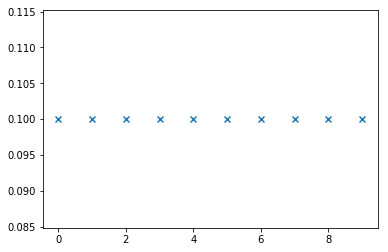

In [3]:
expected_prob_list = [0.1 for _ in range(0,10)]

plt.scatter(range(0,10), expected_prob_list, marker = 'x')
plt.show()

If the measured value IS actually following the random variable's probability distribution, then more sampling done of the measured value, the closer the distribution of measured value will match the  random variable's probability distribution.

This is illustrated in the below plots - The more samples taken, the more the distribution coincides with the expected distribution.

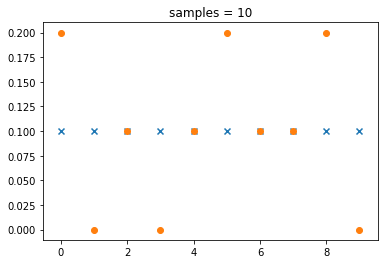

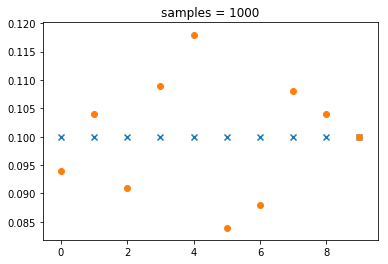

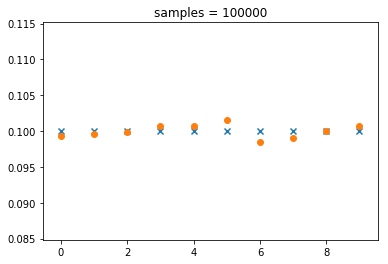

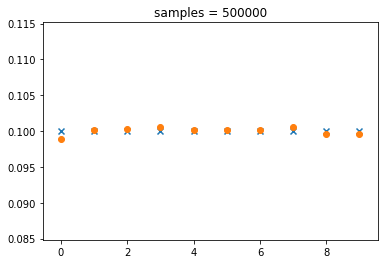

In [4]:
def measure(num_samples):

    # Lets try get some actual values of X by calling my_random_variable
    # and see how it's distribution compares with expected list.
    count = [0 for _ in range(0, 10)]

    for _ in range(0, num_samples):
        x = my_random_variable()
        count[x] = count[x] + 1

    realised_prob_list = []
    for c in count:
        realised_prob_list.append(1.0 * c/num_samples)
 

    plt.scatter(range(0,10), expected_prob_list, marker = 'x')
    plt.scatter(range(0,10), realised_prob_list, marker = 'o')
    plt.title('samples = %d' % num_samples)
    plt.show()


measure(10)
measure(1000)
measure(100000)
measure(500000)



### Continuous Distributions

The previous random variable had a fixed number of possible outcomes( 0 to 9 in the above case).

What about measurable values that are continuous? We can't map every possible outcome to a probability, because there are infinite real numbers in any range! 

For continuous distributions, it doesn't make sense to ask the question - what is the probability that value X will appear... It makes more sense to ask - What is the probability that the value will lie in between a range (X1, X2)? See the (wikipedia)[https://en.wikipedia.org/wiki/Probability_density_function#Example] article for a good example.

To help with this new type of question (probability in a range), it helps to define a *probability density function (pdf)*. The integral of the *pdf* over the queried range is the probability that a given value will lie in that range.

#### Uniform Continuous Distribution

Represents a random variable whose value is uniformally distributed between (0,1)


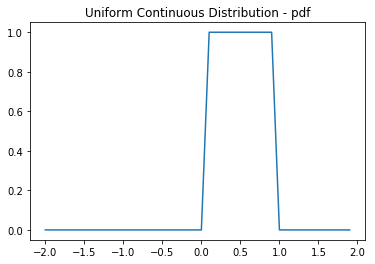

In [5]:
xs = [x/10.0 for x in range(-20, 20)]

def ucd_pdf(x):
    return 1 if (x > 0 and x < 1) else 0

plt.plot(xs, [ucd_pdf(x) for x in xs])
plt.title("Uniform Continuous Distribution - pdf")
plt.show()

Let's look at our definition now and try to ask some questions

What's the probability that X lies in between 0 and 1: That's area of the entire rectangle which is equal to 1.
What's the probability that X lies in between 0.1 and 0.3?: Again, integral of the above function over 0.1 and 0.3 - That's 0.2 
What's the probability that X lies in between -1 and 0: 0



More useful than a *pdf* is a *cumulative distribution function(cdf)*. This function tells us what's the probability that the value is less than X. Basically:

**cdf(x) = Integral of *pdf* over (-infinity ,x)**

So what does the *cdf* for a uniform distribution look like?

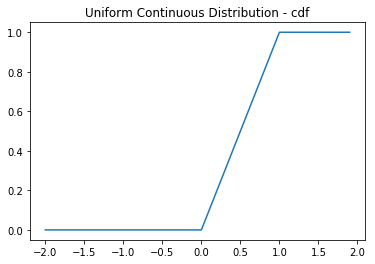

In [6]:
def ucd_cdf(x):
    if x <= 0:
        return 0
    if x < 0 and x < 1:
        return x
    if x >= 1:
        return 1
    return x if (x > 0 and x < 1) else 0

plt.plot(xs, [ucd_cdf(x) for x in xs])
plt.title("Uniform Continuous Distribution - cdf")
plt.show()


It should be obvious that cdf is an increasing function and tends to go to 1 as x tends to infinity.

#### Normal Distribution

Standard Normal Distribution mu=0, sigma = 1. (mu is mean, sigma is standard deviation).

Z = sigma * X + mu (where X is Standard Normal Distribution)


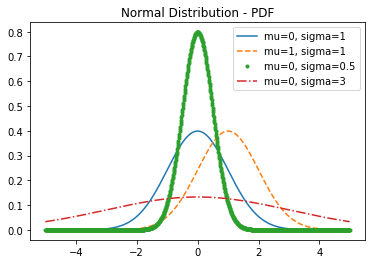

In [7]:
import math

xs = [x/100.0 for x in range(-500, 500)]

def normal_pdf(x, mu, sigma):
    sq = math.sqrt(2 * math.pi)
    exp_pow = - ((x-mu) ** 2) / (2 * sigma ** 2) 
    return math.exp(exp_pow) / (sq * sigma)

plt.plot(xs, [normal_pdf(x,0,1) for x in xs], '-', label = 'mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x,1,1) for x in xs], '--', label = 'mu=1, sigma=1')
plt.plot(xs, [normal_pdf(x,0,0.5) for x in xs], '.', label = 'mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x,0,3) for x in xs], '-.', label = 'mu=0, sigma=3')
plt.title("Normal Distribution - PDF")
plt.legend()
plt.show()

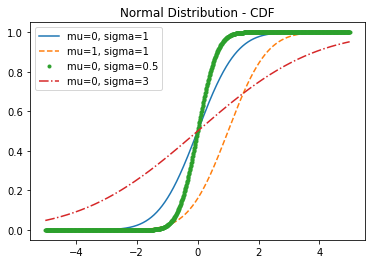

In [8]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

plt.plot(xs, [normal_cdf(x,0,1) for x in xs], '-', label = 'mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x,1,1) for x in xs], '--', label = 'mu=1, sigma=1')
plt.plot(xs, [normal_cdf(x,0,0.5) for x in xs], '.', label = 'mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x,0,3) for x in xs], '-.', label = 'mu=0, sigma=3')
plt.title("Normal Distribution - CDF")
plt.legend()
plt.show()


0.0


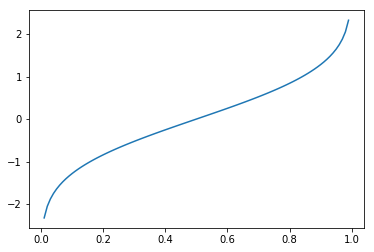

In [9]:
def inverse_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_cdf(p, tolerance=tolerance)
    low_z, low_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2.0
        mid_p = normal_cdf(mid_z)
        if mid_p > p:
            hi_z = mid_z
        elif mid_p < p:
            low_z = mid_z
        else:
            break
    return mid_z

print inverse_cdf(0.5)

xs = [x/100.0 for x in range(1, 100)]
plt.plot(xs, [inverse_cdf(x,0,1) for x in xs], '-', label = 'mu=0, sigma=1')
plt.show()



### Central Limit Theorem

Random Variable defined as an average of independent and identically distributed random variable is itself normally distributed.

In [10]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))



Central Limit Theorem says here that binomial is normally distributed (as it's defined as the average/sum of individual and identical random variables.)

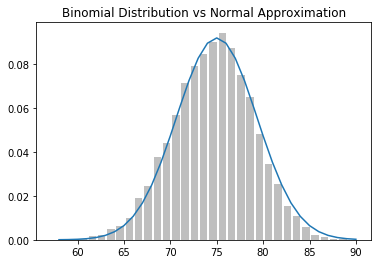

In [11]:
from collections import Counter

def make_hist(p,n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [1.0 * v / num_points for v in histogram.values()],
            0.8,
            color='0.75'
           )
    
    mu = p*n
    sigma = math.sqrt(n * p * (1-p))
    
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) 
          for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs Normal Approximation")
    plt.show()
    
make_hist(0.75, 100, 10000)